Make sure DMBA package is available

> Indented block



In [87]:
pip install dmba

In [88]:
import pandas as pd #data analysis
from sklearn.model_selection import train_test_split #machine learning
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

## Table 6.3

In [89]:
# Reduce data frame to the top 1000 rows and select columns for regression analysis
car_df = dmba.load_data('ToyotaCorolla.csv') #read the csv
car_df = car_df.iloc[0:1000] #select the first 1000 rows

In [90]:
car_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [91]:
car_df.dtypes

,0
Id,int64
Model,object
Price,int64
Age_08_04,int64
Mfg_Month,int64
Mfg_Year,int64
KM,int64
Fuel_Type,object
HP,int64
Met_Color,int64


In [ ]:
variables = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Weight', 'Price']

In [92]:
car_df.Fuel_Type = car_df['Fuel_Type'].astype(pd.CategoricalDtype())

In [93]:
car_df['Fuel_Type'] = car_df['Fuel_Type'].cat.codes

In [77]:
data_for_analysis = car_df[variables]

In [68]:
data_for_analysis.head()

,Age_08_04,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Price
0,23,46986,Diesel,90,1,0,2000,3,210,1165,13500
1,23,72937,Diesel,90,1,0,2000,3,210,1165,13750
2,24,41711,Diesel,90,1,0,2000,3,210,1165,13950
3,26,48000,Diesel,90,0,0,2000,3,210,1165,14950
4,30,38500,Diesel,90,0,0,2000,3,210,1170,13750


In [78]:
y = data_for_analysis['Price'] #assign the outcome to y

X = data_for_analysis.loc[:,~data_for_analysis.columns.isin(['Price'])] #assign all other variables to X (as predictors)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1) #partition the data to train/test #random_state contrrols the shuffling applied to the data before applying the split


In [79]:
car_lm = LinearRegression() #define the linear regression model
car_lm.fit(train_X, train_y) #fit the regeression model the training set

LinearRegression()

In [80]:
# print coefficients
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures
regressionSummary(train_y, car_lm.predict(train_X))

intercept  -1261.9998890559418
       Predictor  coefficient
0      Age_08_04  -140.701236
1             KM    -0.017944
2      Fuel_Type  1171.884075
3             HP    36.758950
4      Met_Color    84.728332
5      Automatic   424.027432
6             CC     0.014680
7          Doors   -49.003965
8  Quarterly_Tax    13.442645
9         Weight    12.901806

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1400.6437
            Mean Absolute Error (MAE) : 1047.9577
          Mean Percentage Error (MPE) : -1.0240
Mean Absolute Percentage Error (MAPE) : 9.3153


In [81]:
pred_y = car_lm.predict(train_X) #prediction performance on the training set

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, car_lm))
print('AIC : ', AIC_score(train_y, pred_y, car_lm))
print('BIC : ', BIC_score(train_y, pred_y, car_lm))

adjusted r2 :  0.8540312849193137
AIC :  10420.350871882292
BIC :  10473.114027744887


## Table 6.4

In [62]:
# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(test_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': test_y,
                       'Residual': test_y - car_lm_pred}) #dataframe with three columns
print(result.head(20))

# Compute common accuracy measures
regressionSummary(test_y, car_lm_pred)

     Predicted  Actual      Residual
507    11500.0   11500  0.000000e+00
818     8950.0    8950  0.000000e+00
452    11450.0   11450  0.000000e+00
368    11450.0   11450  0.000000e+00
242    11950.0   11950  0.000000e+00
929     9995.0    9995  0.000000e+00
262    13500.0   13500 -1.818989e-12
810     7950.0    7950  0.000000e+00
318     9900.0    9900  0.000000e+00
49     21950.0   21950  0.000000e+00
446    11950.0   11950  0.000000e+00
142    19950.0   19950  0.000000e+00
968     9950.0    9950  0.000000e+00
345    14950.0   14950 -1.818989e-12
971    10495.0   10495  0.000000e+00
133    15950.0   15950 -1.818989e-12
104    19450.0   19450  0.000000e+00
6      16900.0   16900  0.000000e+00
600    11250.0   11250  0.000000e+00
496    11750.0   11750  0.000000e+00

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : -0.0000
Mean Abso

## Figure 6.1
Determine the residuals and create a histogram

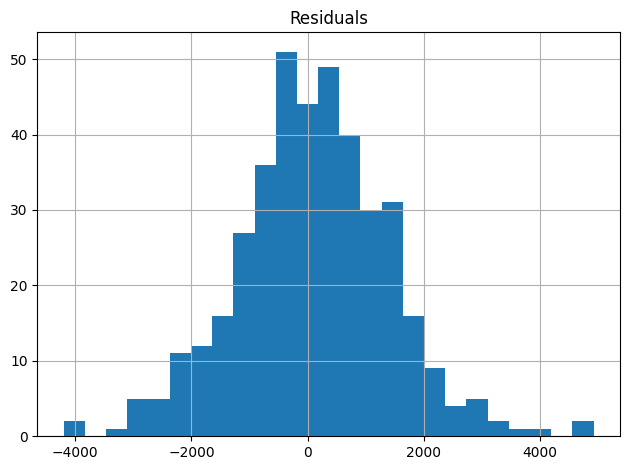

In [33]:
car_lm_pred = car_lm.predict(test_X)
all_residuals = test_y - car_lm_pred
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

## Forward selection

In [ ]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=11565.07, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, add None
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']


## Backward elimination

In [ ]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=10422.30
Step: score=10420.33, remove CC
Step: score=10418.79, remove Met_Color
Step: score=10417.29, remove Doors
Step: score=10417.29, remove None
['Age_08_04', 'KM', 'HP', 'Automatic', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


In [ ]:
regressionSummary(test_y, best_model.predict(test_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 103.3045
       Root Mean Squared Error (RMSE) : 1314.4844
            Mean Absolute Error (MAE) : 1016.8875
          Mean Percentage Error (MPE) : -0.2700
Mean Absolute Percentage Error (MAPE) : 8.9984


# Stepwise Regression

In [ ]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=11565.07, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, unchanged None
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']


## Regularized methods

In [83]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(data_for_analysis), columns=data_for_analysis.columns)

In [84]:
X_scaled = scaled_df[predictors]

y_scaled = scaled_df[outcome] #assign the outcome to y

scaled_train_X, scaled_test_X, scaled_train_y, scaled_test_y = train_test_split(X_scaled, y_scaled, test_size=0.4, random_state=1)

In [85]:
lasso = Lasso(alpha=1.0)
lasso.fit(train_X, train_y)
regressionSummary(test_y, lasso.predict(test_X))


Regression statistics

                      Mean Error (ME) : 103.5905
       Root Mean Squared Error (RMSE) : 1314.3228
            Mean Absolute Error (MAE) : 1018.3696
          Mean Percentage Error (MPE) : -0.2667
Mean Absolute Percentage Error (MAPE) : 9.0235


In [86]:
ridge = Ridge(alpha=1.0)
ridge.fit(train_X, train_y)
regressionSummary(test_y, ridge.predict(test_X))


Regression statistics

                      Mean Error (ME) : 104.1463
       Root Mean Squared Error (RMSE) : 1314.7482
            Mean Absolute Error (MAE) : 1018.7075
          Mean Percentage Error (MPE) : -0.2622
Mean Absolute Percentage Error (MAPE) : 9.0272
